In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

In [2]:
file_path = 'Adidas US Sales Datasets.xlsx'
file_name = pd.read_excel(file_path)
df = pd.DataFrame(file_name)
print(df.head(5))

   Unnamed: 0   Unnamed: 1             Unnamed: 2           Unnamed: 3  \
0         NaN          NaN  Adidas Sales Database                  NaN   
1         NaN          NaN                    NaN                  NaN   
2         NaN          NaN                    NaN                  NaN   
3         NaN     Retailer            Retailer ID         Invoice Date   
4         NaN  Foot Locker                1185732  2020-01-01 00:00:00   

  Unnamed: 4 Unnamed: 5 Unnamed: 6             Unnamed: 7      Unnamed: 8  \
0        NaN        NaN        NaN                    NaN             NaN   
1        NaN        NaN        NaN                    NaN             NaN   
2        NaN        NaN        NaN                    NaN             NaN   
3     Region      State       City                Product  Price per Unit   
4  Northeast   New York   New York  Men's Street Footwear              50   

   Unnamed: 9  Unnamed: 10       Unnamed: 11       Unnamed: 12   Unnamed: 13  
0         NaN

In [3]:
print(df.info())
print(22*'--')
print(df.shape)
print(22*'--')
print(df.duplicated().value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9652 entries, 0 to 9651
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   9649 non-null   object 
 2   Unnamed: 2   9650 non-null   object 
 3   Unnamed: 3   9649 non-null   object 
 4   Unnamed: 4   9649 non-null   object 
 5   Unnamed: 5   9649 non-null   object 
 6   Unnamed: 6   9649 non-null   object 
 7   Unnamed: 7   9649 non-null   object 
 8   Unnamed: 8   9649 non-null   object 
 9   Unnamed: 9   9649 non-null   object 
 10  Unnamed: 10  9649 non-null   object 
 11  Unnamed: 11  9649 non-null   object 
 12  Unnamed: 12  9649 non-null   object 
 13  Unnamed: 13  9649 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.0+ MB
None
--------------------------------------------
(9652, 14)
--------------------------------------------
False    9651
True        1
Name: count, dtype: int64


In [4]:
df.columns = df.iloc[3]
df  = df.iloc[4: , 1:].reset_index(drop= True)

df

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


In [5]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['year'] = df['Invoice Date'].dt.year
df['month'] = df['Invoice Date'].dt.month
df['day'] = df['Invoice Date'].dt.day

In [6]:
# print(df.info())
print(22*'--')
print(df.describe(include= 'all'))

--------------------------------------------
3          Retailer  Retailer ID                   Invoice Date Region  \
count          9648       9648.0                           9648   9648   
unique            6          4.0                            NaN      5   
top     Foot Locker    1185732.0                            NaN   West   
freq           2637       5265.0                            NaN   2448   
mean            NaN          NaN  2021-05-10 15:20:44.776119296    NaN   
min             NaN          NaN            2020-01-01 00:00:00    NaN   
25%             NaN          NaN            2021-02-17 00:00:00    NaN   
50%             NaN          NaN            2021-06-04 00:00:00    NaN   
75%             NaN          NaN            2021-09-16 00:00:00    NaN   
max             NaN          NaN            2021-12-31 00:00:00    NaN   
std             NaN          NaN                            NaN    NaN   

3            State      City                Product  Price per Uni

In [7]:
df.duplicated().value_counts()

False    9648
Name: count, dtype: int64

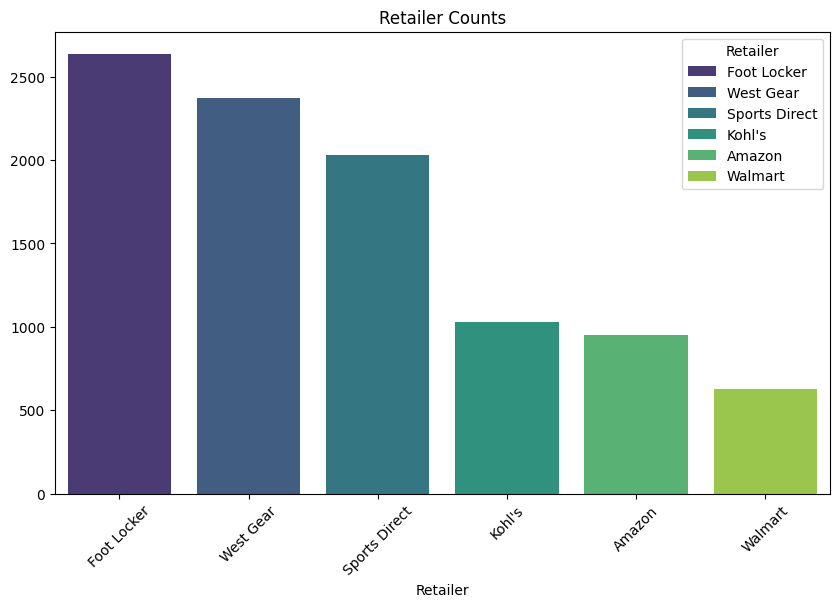

In [8]:
retailer_counts = df.Retailer.value_counts().sort_values(ascending= False)

plt.figure(figsize=(10 , 6))
sns.barplot(x = retailer_counts.index , y = retailer_counts.values , palette='viridis' , hue=retailer_counts.index , dodge=False , legend=True  )
plt.title('Retailer Counts')
plt.xticks(rotation = 45)
plt.show()

#### Retailer Market Share

C:\Users\v.lotfi\AppData\Local\Temp\ipykernel_6172\4083639108.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  market_share.plot(kind = 'pie' , color = palette_color , autopct = '%1.1f%%'  , startangle=140 )


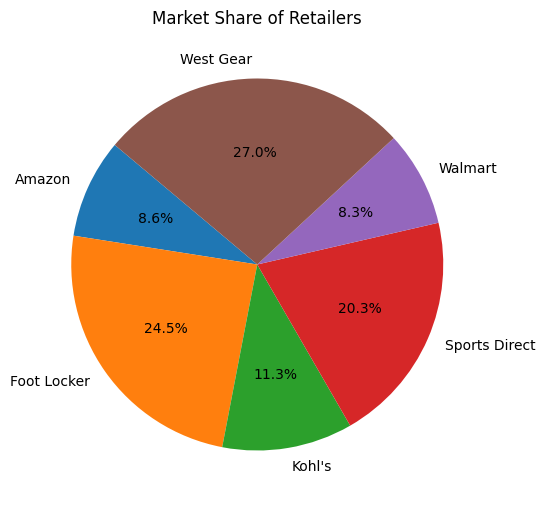

In [10]:
Retailer_sales = df.groupby(by = 'Retailer')['Total Sales'].agg('sum')
Totale_sales = Retailer_sales.sum()
market_share = Retailer_sales / Totale_sales

explode = [0, 0.1, 0, 0, 0] 
palette_color = sns.color_palette('colorblind6')
plt.figure(figsize=(6 , 10))
market_share.plot(kind = 'pie' , color = palette_color , autopct = '%1.1f%%'  , startangle=140 )
plt.title('Market Share of Retailers')
plt.ylabel('')
plt.show()

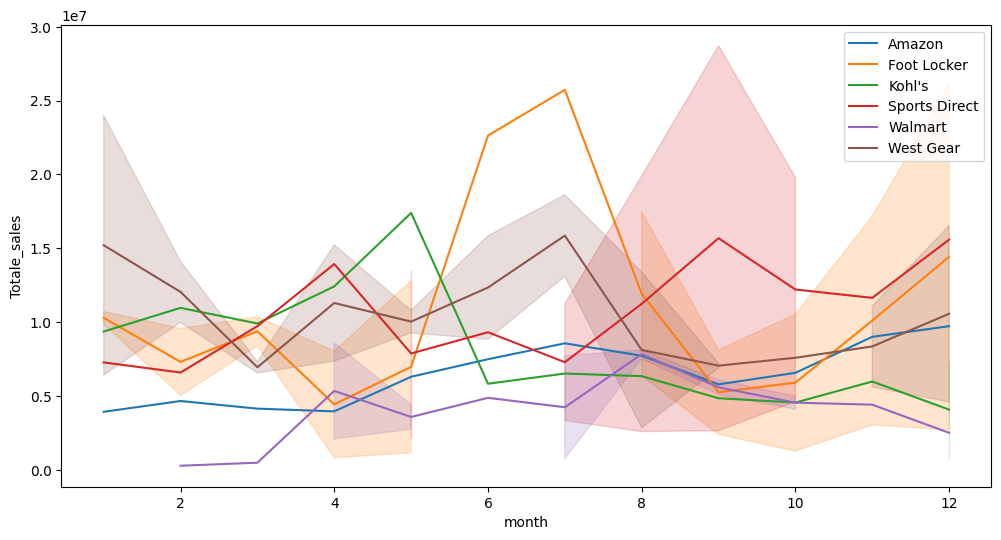

In [77]:
retailer_sales = df.groupby(by = ['Retailer', 'year', 'month'])['Total Sales'].agg('sum').unstack(level= 0 ).reset_index()

plt.figure(figsize= (12 , 6))
for retailer in retailer_sales.columns[2:]:
    sns.lineplot(data= retailer_sales , x= 'month' , y = retailer , label = retailer )

plt.ylabel('Totale_sales')
plt.legend()
plt.show()

### Product and Retailer Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x600 with 0 Axes>

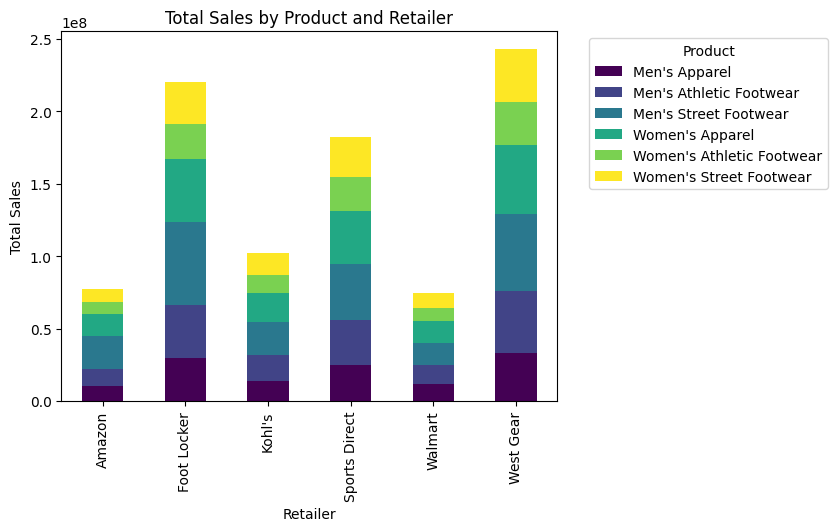

In [105]:
product_sales = df.groupby(by = ['Retailer', 'Product'])['Total Sales'].agg('sum').unstack(level= 1)

plt.figure(figsize=(12 , 6))
product_sales.plot(kind = 'bar' , stacked= True , colormap =  'viridis')
plt.title('Total Sales by Product and Retailer')
plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.legend(title = 'Product' , bbox_to_anchor=(1.05, 1) , loc = 'upper left')
plt.show

### Regional Analysis

Text(0, 0.5, 'Total Sales')

<Figure size 1200x600 with 0 Axes>

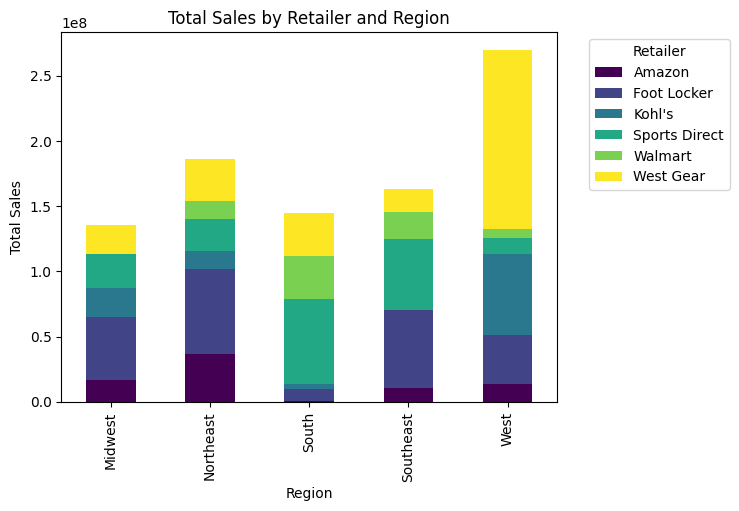

In [123]:
retailer_sales_by_region = df.groupby(by = ['Retailer', 'Region'])['Total Sales'].agg('sum').unstack(level= 0)

plt.figure(figsize=( 12, 6))

retailer_sales_by_region.plot(kind= 'bar' , stacked= True , colormap='viridis')
plt.legend(title = 'Retailer' , loc = 'upper left' , bbox_to_anchor=(1.05, 1))
plt.title('Total Sales by Retailer and Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')

### Time Series Analysis

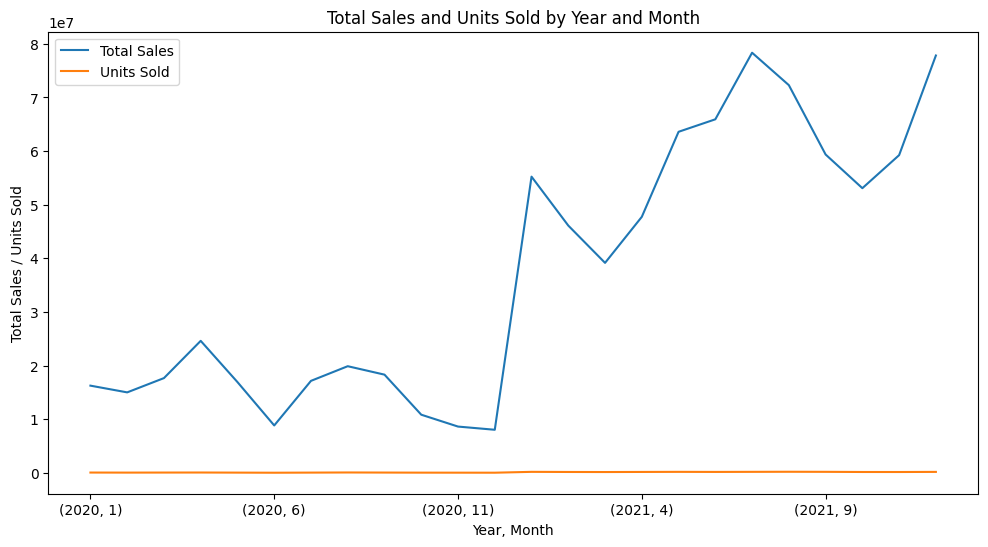

In [136]:
sales_by_year_month = df.groupby(by = ['year', 'month'])['Total Sales'].agg('sum')
unit_by_year_month = df.groupby(by = ['year', 'month'])['Units Sold'].agg('sum')

plt.figure(figsize= (12 , 6))

sales_by_year_month.plot(kind = 'line')
unit_by_year_month.plot(kind = 'line')
plt.title('Total Sales and Units Sold by Year and Month')
plt.xlabel('Year, Month')
plt.ylabel('Total Sales / Units Sold')
plt.legend()
plt.show()


### Regional Sales Analysis


In [151]:
sales_by_location = df.groupby(by = ['Region', 'State', 'City'])['Total Sales'].agg('sum')
units_by_location  = df.groupby(by = ['Region', 'State', 'City'])['Units Sold'].agg('sum')

print(sales_by_location)
print(22*'--')
print(units_by_location)

Region     State           City          
Midwest    Illinois        Chicago            9797488.0
           Indiana         Indianapolis       8836198.0
           Iowa            Des Moines         7424011.0
           Kansas          Wichita            9972864.0
           Michigan        Detroit           18625433.0
           Minnesota       Minneapolis        7378068.0
           Missouri        St. Louis          9683265.0
           Montana         Billings          15710886.0
           Nebraska        Omaha              5929038.0
           North Dakota    Fargo              7735580.0
           Ohio            Columbus          18484583.0
           South Dakota    Sioux Falls        8495576.0
           Wisconsin       Milwaukee          7727469.0
Northeast  Connecticut     Hartford          11573448.0
           Delaware        Wilmington        12298412.0
           Maine           Portland           9195978.0
           Maryland        Baltimore          7758059.0
      

### Sales Method Analysis

C:\Users\v.lotfi\AppData\Local\Temp\ipykernel_6172\1503988128.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= sales_by_method , ax= ax[0] , palette='viridis')
C:\Users\v.lotfi\AppData\Local\Temp\ipykernel_6172\1503988128.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_by_method  , ax= ax[1] , palette='viridis')


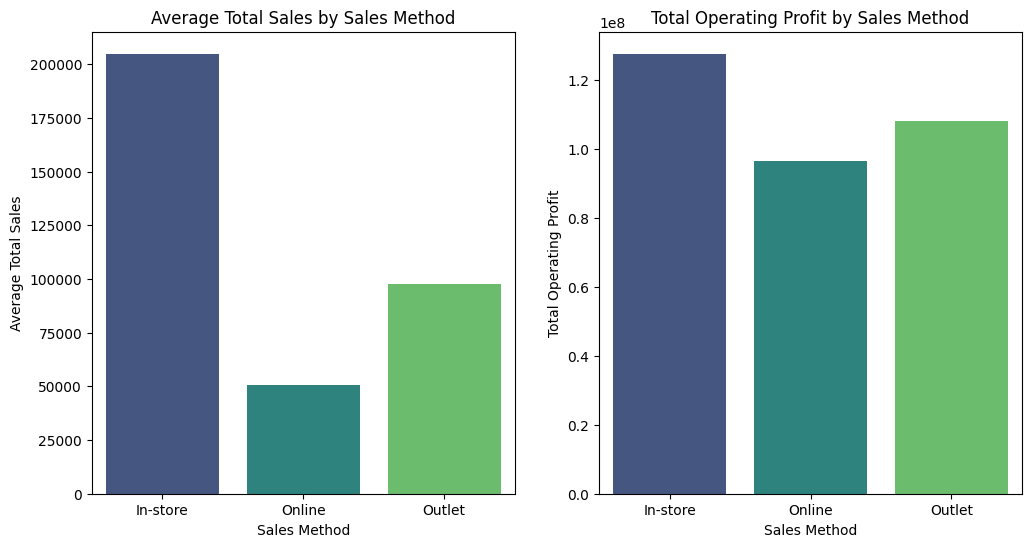

In [166]:
sales_by_method = df.groupby(by = 'Sales Method')['Total Sales'].agg('mean')
profit_by_method = df.groupby(by = 'Sales Method')['Operating Profit'].agg('sum')

fig , ax = plt.subplots(1 , 2 , figsize = (12 , 6))

sns.barplot(data= sales_by_method , ax= ax[0] , palette='viridis')
ax[0].set_title('Average Total Sales by Sales Method')
ax[0].set_xlabel('Sales Method')
ax[0].set_ylabel('Average Total Sales')

sns.barplot(data=profit_by_method  , ax= ax[1] , palette='viridis')
ax[1].set_title('Total Operating Profit by Sales Method')
ax[1].set_xlabel('Sales Method')
ax[1].set_ylabel('Total Operating Profit')

plt.show()

### State and Year-Based Sales Analysis

Text(0, 0.5, 'Units Sold')

<Figure size 1200x600 with 0 Axes>

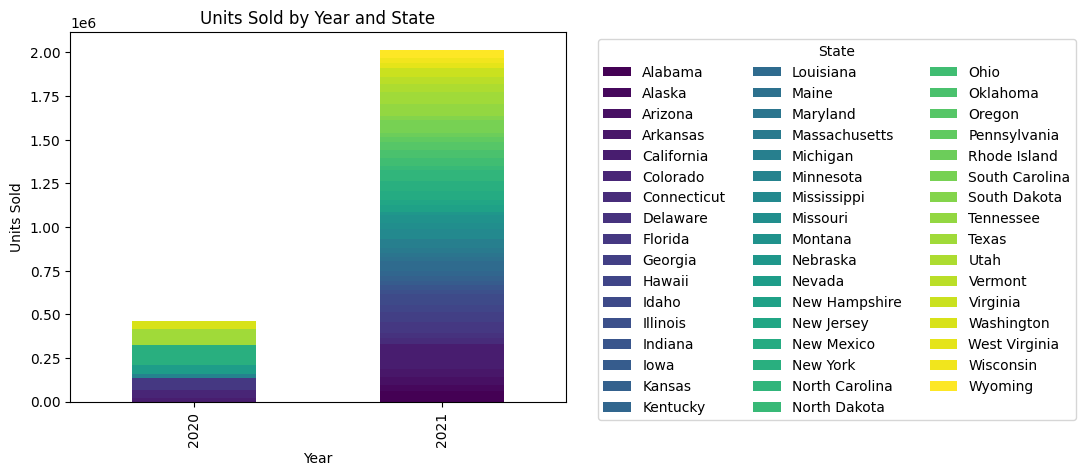

In [185]:
units_by_year_and_state = df.groupby(by = ['year', 'State'])['Units Sold'].agg('sum').reset_index()
units_by_year = units_by_year_and_state.pivot(index= 'year' , columns='State' , values= 'Units Sold')

plt.figure(figsize= (12 ,6))
units_by_year.plot(kind='bar' , stacked= True , colormap='viridis')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3)
plt.title('Units Sold by Year and State')
plt.xlabel('Year')
plt.ylabel('Units Sold')
